In [162]:
%matplotlib inline

from tasks import load_object
from tasks import tasks

from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
import os

In [163]:
IMAGE_PATH = './test' # Change to your directory for test images

In [164]:
models = load_object('./saved_model/models_vgg16_fc6.pkl')
face2bmi = tasks(config={'model':'vgg16', 'layer':'fc6'})
face_array_test = face2bmi.extract_face_feature(IMAGE_PATH)
preds = face2bmi.predict(models, face_array_test)
preds['batch'] = preds.index.map(lambda i: int(i)//5)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVR from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LassoCV from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use 

In [159]:
def show_image(ax, path, bmi, age, gender):   
    sex = 'M' if gender >= 0.5 else 'F'
    arr = load_img(path, target_size=(224,224))
    ax.imshow(arr)
    ax.axis('off')
    ax.set_title('bmi:%d age:%d sex:%s(%3.2f)'%(bmi, age, sex ,gender))
    
def show_image_batch(res):
    res.index = (range(len(res)))
    images = res['index'].tolist()
    fig, ax = plt.subplots(1,5, figsize = (15, 3))
    for i, image in enumerate(images):
        show_image(ax[i], os.path.join(IMAGE_PATH, image),  res.bmi_lasso[i], res.age_lasso[i], res.gender_lr[i])
    plt.show()

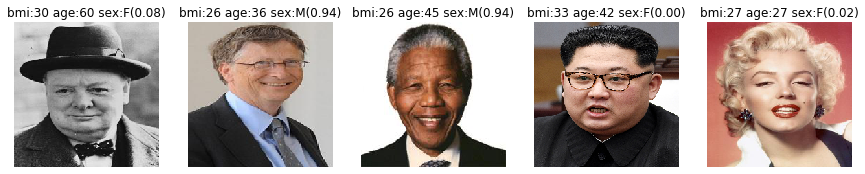

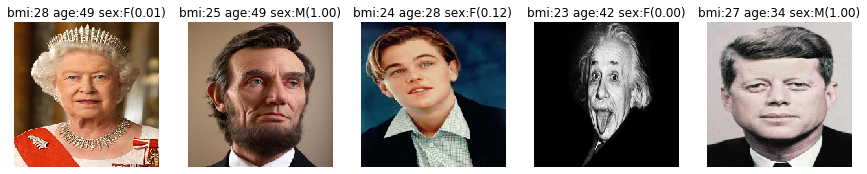

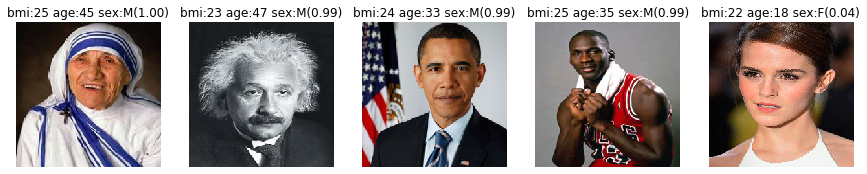

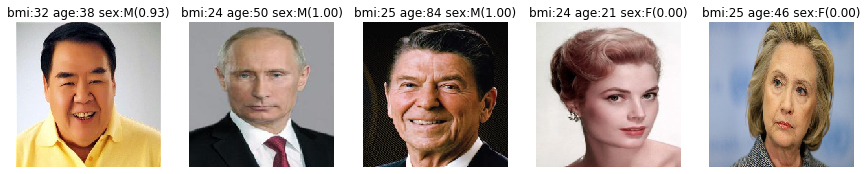

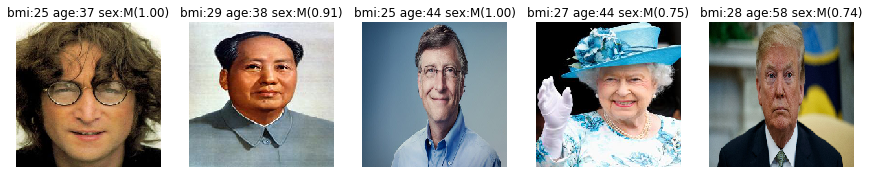

In [160]:
for batch in preds.batch.unique():
    show_image_batch(preds.loc[preds.batch == batch,:])